# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 500

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [6]:
X, y = data.drop(columns=['G3']), data['G3']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

[]

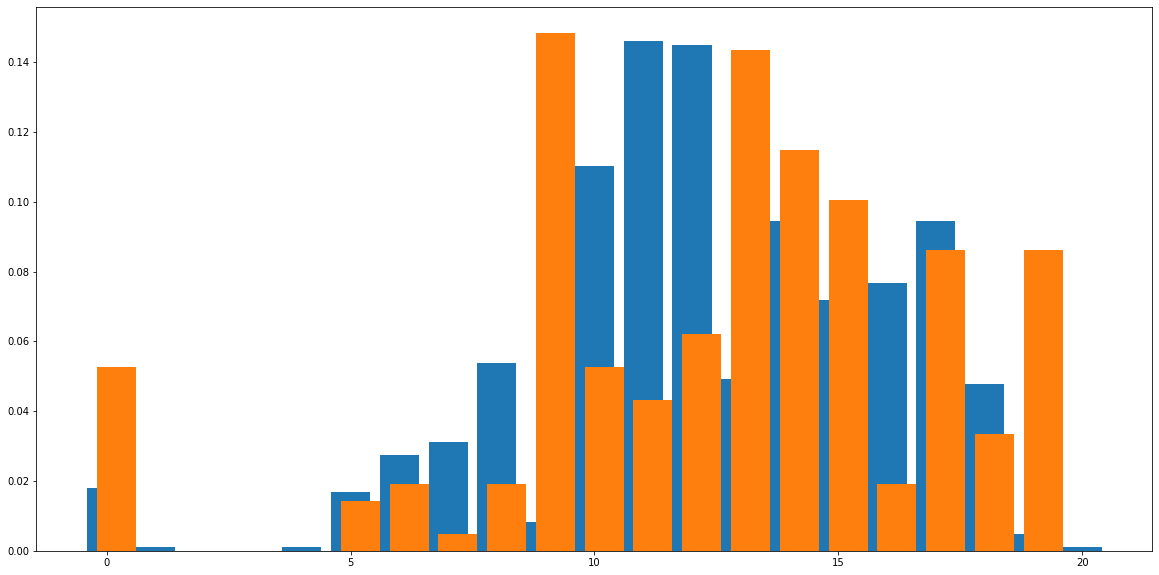

In [8]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.bar(y_train.unique(), y_train.value_counts() / y_train.count())
ax.bar(y_test.unique() + 0.2, y_test.value_counts() / y_test.count())
ax.plot()

В целом, распределение классов получилось одинаковое, но есть перевесы

In [9]:
for column in X_train.columns:
    print(column, ': ', X_train[column].unique())

ID :  [169338 678782 746312 373995 742306 597093 453908 192494 850239 433048
 399635 190877 867667 198176 591594 864200 807492 575028 695277 108296
 489063 234486 367231 236540 796067 981654 952695 554328 478451 928755
 129949 217352 384016 188732 197699 485892 434978 358362 105257 624719
 439080 498103 864577 455906 503908 411811 778154 485397 102989 870931
 632895 373767 141581 726206 633683 345593 924261 457807 459384 297655
 527198 339089 709695 762786 842206 186716 518508 370301 953734 507594
 651325 831324 272851 812702 883052 676866 459915 734154 703254 604053
 196553 700709 577678 476869 133245 292141 275284 728709 729904 771057
 750921 706722 279238 251237 434426 507781 131767 534886 185071 707021
 200152 920546 417936 278805 932040 389125 716709 351280 169203 735578
 556394 224690 122585 433677 719586 135992 143570 608229 725539 663473
 552788 604447 596069 907847 833734 980136 881477 640904 188123 215976
 564057 827706 451337 597739 391313 349524 653094 505930 662126 867993


Можно видеть, что в данных достаточно ошибок. Исправим это, используя наработки из первой лабораторной

In [10]:
def fix(data_in):
    data = data_in.copy()
    for i, row in data.iterrows():
        data.at[i, 'sex'] = data.at[i, 'sex'].upper()
        data.at[i, 'Pstatus'] = data.at[i, 'Pstatus'].upper()
            
        for letter in ['M', 'F']:
            if data.at[i, f'{letter}edu'] == 'o':
                data.at[i, f'{letter}edu'] = '0'
            data.at[i, f'{letter}edu'] = int(data.at[i, f'{letter}edu'])
            data.at[i, f'{letter}job'] = data.at[i, f'{letter}job'].replace('-', '_')

        if data.at[i, 'guardian'] == 'futher':
            data.at[i, 'guardian'] = 'father'
            
    data.Medu = data.Medu.astype('int64')
    data.Fedu = data.Fedu.astype('int64')
    return data

In [11]:
X_train_fixed = fix(X_train)

for column in X_train_fixed.columns:
    print(column, ': ', X_train_fixed[column].unique())

ID :  [169338 678782 746312 373995 742306 597093 453908 192494 850239 433048
 399635 190877 867667 198176 591594 864200 807492 575028 695277 108296
 489063 234486 367231 236540 796067 981654 952695 554328 478451 928755
 129949 217352 384016 188732 197699 485892 434978 358362 105257 624719
 439080 498103 864577 455906 503908 411811 778154 485397 102989 870931
 632895 373767 141581 726206 633683 345593 924261 457807 459384 297655
 527198 339089 709695 762786 842206 186716 518508 370301 953734 507594
 651325 831324 272851 812702 883052 676866 459915 734154 703254 604053
 196553 700709 577678 476869 133245 292141 275284 728709 729904 771057
 750921 706722 279238 251237 434426 507781 131767 534886 185071 707021
 200152 920546 417936 278805 932040 389125 716709 351280 169203 735578
 556394 224690 122585 433677 719586 135992 143570 608229 725539 663473
 552788 604447 596069 907847 833734 980136 881477 640904 188123 215976
 564057 827706 451337 597739 391313 349524 653094 505930 662126 867993


В колонках romantic, famrel, Dalc, Walc, cheating наблюдаются пропуски, а колонка ID не имеет смысла

In [12]:
X_train_fixed.isna().sum()

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel          9
freetime        0
goout           0
Dalc            8
Walc            7
health          0
absences        0
cheating      562
G1              0
G2              0
dtype: int64

cheating можно удалить совсем - пропусков слишком много

По остальным признакам пропусков немного, поэтому записи можно удалить

In [13]:
def drop(data):
    return data.drop(columns=['ID', 'cheating']).dropna(subset=['romantic', 'famrel', 'Dalc', 'Walc'])

X_train_dropped = drop(X_train_fixed)

Удалим выбросы из данных

In [14]:
def exclude_outs(data):
    numeric_data = []

    for column, dtype in zip(data.columns, data.dtypes):
        if dtype == 'int64' or dtype == 'float64':
            numeric_data.append(column)
    return data[(np.abs(sp.stats.zscore(data[numeric_data])) < 3).all(axis=1)]
        
X_train_no_outs = exclude_outs(X_train_dropped)
X_train_no_outs

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
89,Por,GP,M,19,U,GT3,T,2,1,other,other,reputation,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5.0,3,4,1.0,4.0,4,10,7,11
682,Math,GP,M,15,U,GT3,T,3,4,services,services,home,father,1,1,0,yes,no,no,no,yes,yes,yes,no,5.0,5,5,3.0,2.0,5,0,13,13
758,Por,GP,F,15,U,GT3,A,3,3,other,health,reputation,father,1,4,0,yes,no,no,no,yes,yes,no,no,4.0,3,3,1.0,1.0,4,10,10,10
328,Por,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5.0,4,4,1.0,1.0,1,0,15,17
750,Math,MS,M,18,R,LE3,T,1,1,at_home,other,other,mother,2,2,1,no,no,no,yes,no,no,no,no,4.0,4,3,2.0,3.0,5,2,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,Math,GP,F,15,U,GT3,T,4,4,services,services,reputation,father,2,2,2,no,no,yes,no,yes,yes,yes,yes,4.0,4,4,2.0,3.0,5,6,7,9
359,Por,MS,M,16,R,GT3,T,2,2,services,services,course,mother,2,1,0,no,yes,no,yes,yes,yes,yes,yes,5.0,4,3,2.0,4.0,4,6,7,8
603,Math,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,1,1,no,no,no,no,yes,yes,no,no,4.0,3,2,1.0,3.0,5,0,6,5
561,Math,GP,M,19,R,GT3,T,3,3,other,services,reputation,father,1,2,1,no,no,no,yes,yes,yes,no,yes,4.0,5,3,1.0,2.0,5,0,15,12


Т.к. у нас изменилась размерность данных, то она же должна измениться у целевой переменной

In [15]:
y_train_dropped = y_train[X_train_no_outs.index]
y_train_dropped

89     11
682    12
758    10
328    17
750    12
       ..
792     8
359     8
603     0
561    12
237    12
Name: G3, Length: 707, dtype: int64

Трансформируем признаки - категориальные закодируем с помощью OneHotEncoder, а числовые - MinMaxScaler

In [16]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
 

def get_categ_cols(data):
    return data[set(data.columns) - set(get_num_cols(data))]
 

def get_num_cols(data):
    numeric_data = [column for column, dtype in zip(data.columns, data.dtypes) if '64' in str(dtype)]
    return data[numeric_data]


vec = make_union(*[
   make_pipeline(FunctionTransformer(get_categ_cols, validate=False),  OneHotEncoder(sparse=False)),
   make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='median'), MinMaxScaler()),
])

In [17]:
vec.fit(X_train_no_outs)

X_train_transformed = pd.DataFrame(vec.transform(X_train_no_outs))
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.8,0.50,0.25,0.0,0.000000,0.0,1.000000,0.50,0.75,0.000000,0.75,0.75,0.454545,0.2500,0.466667
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.75,1.00,0.0,0.000000,0.0,1.000000,1.00,1.00,0.666667,0.25,1.00,0.000000,0.6250,0.600000
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.75,0.0,1.000000,0.0,0.666667,0.50,0.50,0.000000,0.00,0.75,0.454545,0.4375,0.400000
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.6,1.00,1.00,0.5,0.666667,0.0,1.000000,0.75,0.75,0.000000,0.00,0.00,0.000000,0.7500,0.866667
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.6,0.25,0.25,0.5,0.333333,0.5,0.666667,0.75,0.50,0.333333,0.50,1.00,0.090909,0.6250,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.00,1.00,0.5,0.333333,1.0,0.666667,0.75,0.75,0.333333,0.50,1.00,0.272727,0.2500,0.333333
703,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.2,0.50,0.50,0.5,0.000000,0.0,1.000000,0.75,0.50,0.333333,0.75,0.75,0.272727,0.2500,0.266667
704,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.8,0.25,0.25,0.5,0.000000,0.5,0.666667,0.50,0.25,0.000000,0.50,1.00,0.000000,0.1875,0.066667
705,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.8,0.75,0.75,0.0,0.333333,0.5,0.666667,1.00,0.50,0.000000,0.25,1.00,0.000000,0.7500,0.533333


In [18]:
categ = vec.transformer_list[0][1].steps[1][1].get_feature_names(get_categ_cols(X_train_no_outs).columns)

In [19]:
num_mean = np.array(get_num_cols(X_train_no_outs).columns)

In [20]:
print(categ.shape)
print(num_mean.shape)

cols = np.append(categ, num_mean)
cols

(45,)
(15,)


array(['internet_no', 'internet_yes', 'activities_no', 'activities_yes',
       'sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Subject_Math',
       'Subject_Por', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'address_R', 'address_U', 'romantic_no',
       'romantic_yes', 'higher_no', 'higher_yes', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'nursery_no', 'nursery_yes', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'famsup_no',
       'famsup_yes', 'school_GP', 'school_MS', 'guardian_father',
       'guardian_mother', 'guardian_other', 'Pstatus_A', 'Pstatus_T',
       'schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'age',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'G2'], dtype=object)

In [21]:
X_train_transformed.columns = cols
X_train_transformed

,internet_no,internet_yes,activities_no,activities_yes,sex_F,sex_M,famsize_GT3,famsize_LE3,Subject_Math,Subject_Por,reason_course,reason_home,reason_other,reason_reputation,address_R,address_U,romantic_no,romantic_yes,higher_no,higher_yes,...,Pstatus_T,schoolsup_no,schoolsup_yes,paid_no,paid_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.8,0.50,0.25,0.0,0.000000,0.0,1.000000,0.50,0.75,0.000000,0.75,0.75,0.454545,0.2500,0.466667
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.75,1.00,0.0,0.000000,0.0,1.000000,1.00,1.00,0.666667,0.25,1.00,0.000000,0.6250,0.600000
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.75,0.0,1.000000,0.0,0.666667,0.50,0.50,0.000000,0.00,0.75,0.454545,0.4375,0.400000
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.6,1.00,1.00,0.5,0.666667,0.0,1.000000,0.75,0.75,0.000000,0.00,0.00,0.000000,0.7500,0.866667
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.6,0.25,0.25,0.5,0.333333,0.5,0.666667,0.75,0.50,0.333333,0.50,1.00,0.090909,0.6250,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.00,1.00,0.5,0.333333,1.0,0.666667,0.75,0.75,0.333333,0.50,1.00,0.272727,0.2500,0.333333
703,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.2,0.50,0.50,0.5,0.000000,0.0,1.000000,0.75,0.50,0.333333,0.75,0.75,0.272727,0.2500,0.266667
704,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.8,0.25,0.25,0.5,0.000000,0.5,0.666667,0.50,0.25,0.000000,0.50,1.00,0.000000,0.1875,0.066667
705,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.8,0.75,0.75,0.0,0.333333,0.5,0.666667,1.00,0.50,0.000000,0.25,1.00,0.000000,0.7500,0.533333


Рассмотрим влияние признаков на итоговую оценку. Для этого расммотрим матрицу корреляций для числовых признаков

<AxesSubplot:>

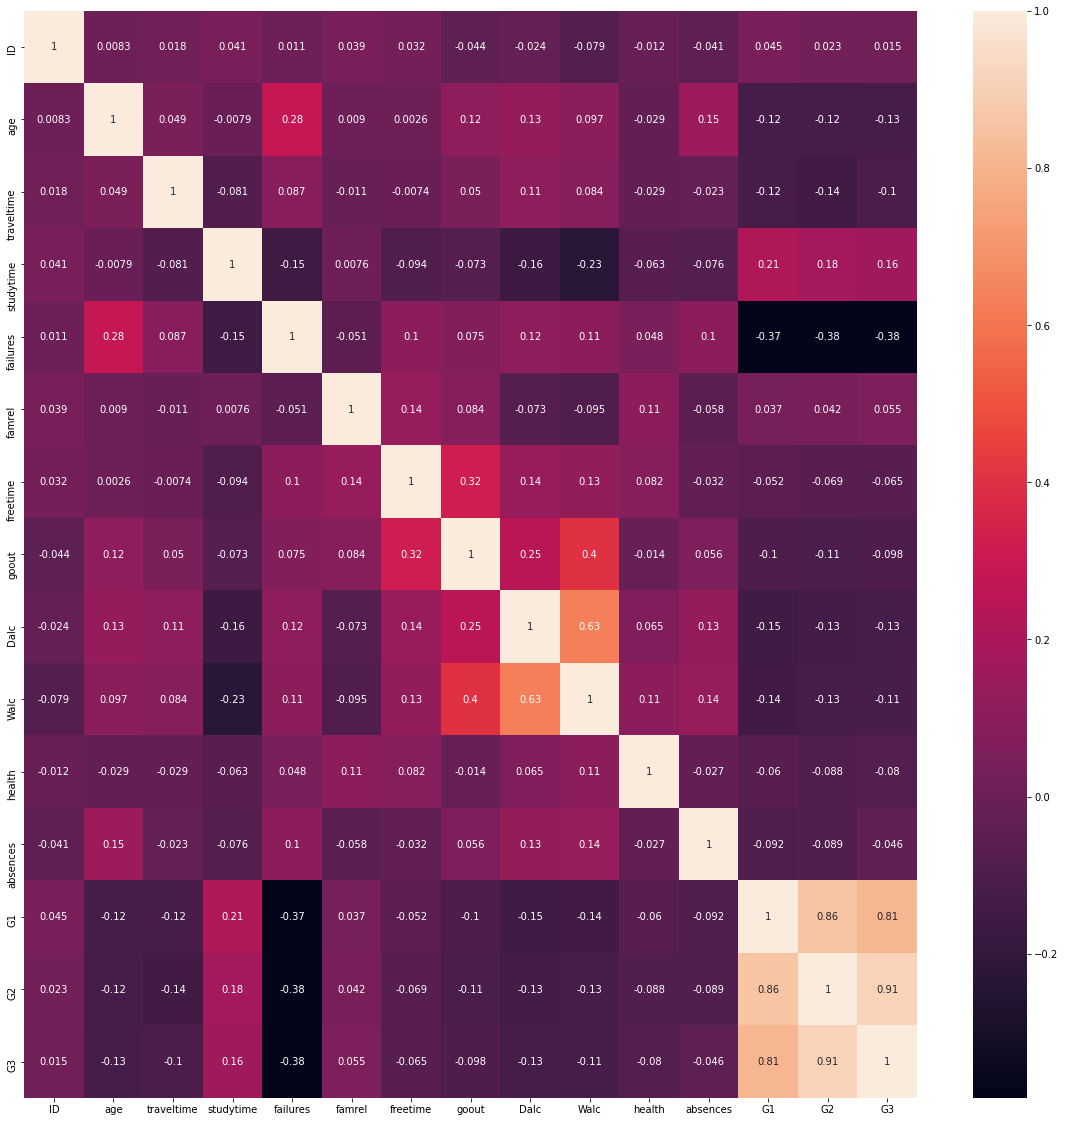

In [22]:
fig, ax = plt.subplots(figsize=(20,20))

corr = data[get_num_cols(data).columns].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

Как можно видеть, на итоговую оценку сильно влияют остальные оценки, число заваленных экзаменов, и время, уделяемое учёбе. Про остальные признаки сказать что-то утвердительно нельзя

In [23]:
data_categ_and_Gs = pd.concat([data[get_categ_cols(data).columns].apply(lambda x : pd.factorize(x)[0]), data[['G1', 'G2', 'G3']]], axis=1)

<AxesSubplot:>

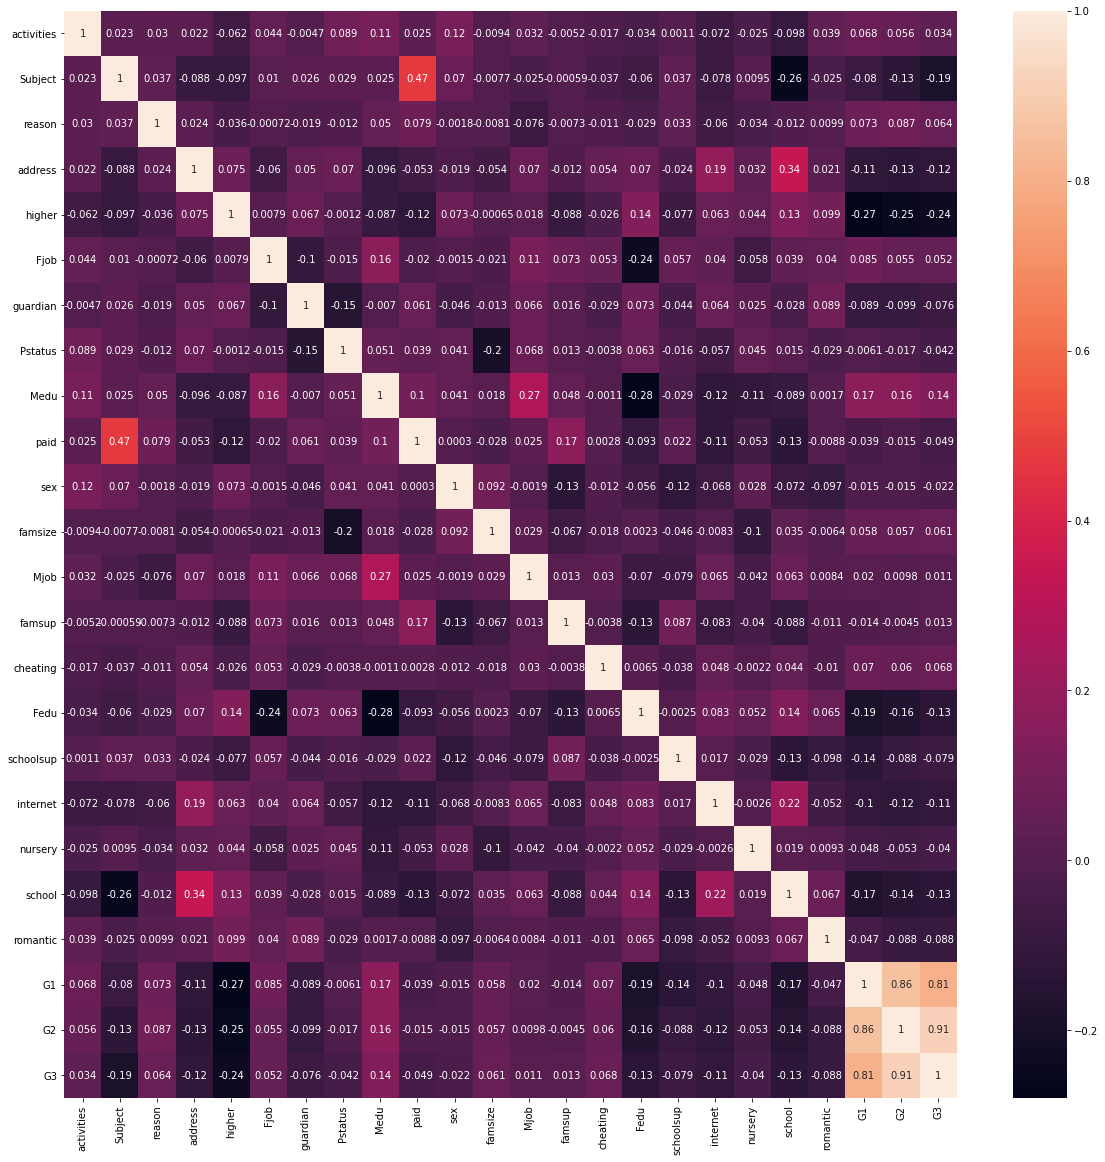

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))

corr = data_categ_and_Gs.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

Что касается категориальных данных, то сильно влияющих признаков нет, однако можно сказать, что наличие интернета, выбранный предмет, адрес, желание пойти в ВУЗ, образование родителей и школа влияют на итоговую оценку.

Удалять какие-либо признаки я не буду, т.к. возможно, что не были учтены какие-то влияния. Исключения: были удалены признаки ID и cheating, т.к. первый не имеет смысла в нашей задаче, а во втором много пропусков

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [25]:
X_train_G1 = X_train_transformed.drop(columns=['G2'])
X_train_no_G1 = X_train_transformed.drop(columns=['G1', 'G2'])

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [27]:
linear_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'n_jobs': range(1, 15)
}

lasso_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': range(1, 15),
    'alpha': np.linspace(1e-4, 1000, 200),
    'tol': np.linspace(1e-6, 1, 1000),
    'selection': ['cyclic', 'random']
}

ridge_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': range(1, 100),
    'alpha': np.linspace(1e-4, 1000, 200),
    'tol': np.linspace(1e-6, 1, 1000),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

knr_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}

dtr_params = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rfr_params = {
    'n_estimators': range(1, 200),
    'criterion': ['mse', 'mae'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

### С использованием признака G1

In [28]:
linear_G1 = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(X_train_G1, y_train_dropped).best_estimator_

print(linear_G1)

lasso_G1 = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error'
).fit(X_train_G1, y_train_dropped).best_estimator_

print(lasso_G1)

ridge_G1 = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error'
).fit(X_train_G1, y_train_dropped).best_estimator_

print(ridge_G1)

knr_G1 = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error'
).fit(X_train_G1, y_train_dropped).best_estimator_

print(knr_G1)

dtr_G1 = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error'
).fit(X_train_G1, y_train_dropped).best_estimator_

print(dtr_G1)

rfr_G1 = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error'
).fit(X_train_G1, y_train_dropped).best_estimator_

print(rfr_G1)

LinearRegression(fit_intercept=False, n_jobs=11)
Lasso(alpha=763.8191190954774, max_iter=12, tol=0.19719799999999998)
Ridge(alpha=55.27647638190955, fit_intercept=False, max_iter=13, solver='saga',
      tol=0.875876)
KNeighborsRegressor(algorithm='brute', leaf_size=40, metric='manhattan',
                    n_neighbors=12)
DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_split=3,
                      splitter='random')
RandomForestRegressor(max_depth=6, min_samples_split=5, n_estimators=50)


### Без использования признака G1

In [29]:
linear_no_G1 = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error'
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(linear_no_G1)

lasso_no_G1 = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error'
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(lasso_no_G1)

ridge_no_G1 = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error'
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(ridge_no_G1)

knr_no_G1 = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error'
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(knr_no_G1)

dtr_no_G1 = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error'
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(dtr_no_G1)

rfr_no_G1 = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error'
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(rfr_no_G1)

LinearRegression(fit_intercept=False, n_jobs=6)
Lasso(alpha=829.1457457286432, max_iter=3, tol=0.591592)
Ridge(alpha=90.45235226130654, fit_intercept=False, max_iter=3, normalize=True,
      solver='sag', tol=0.795796)
KNeighborsRegressor(metric='euclidean', n_neighbors=10, weights='distance')
DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      min_samples_split=8)
RandomForestRegressor(criterion='mae', max_depth=8, max_features=None,
                      min_samples_split=9, n_estimators=165)


### Сравнение моделей

In [30]:
models = {
    'linear_G1': linear_G1,
    'lasso_G1': lasso_G1,
    'ridge_G1': ridge_G1,
    'knr_G1': knr_G1,
    'dtr_G1': dtr_G1,
    'rfr_G1': rfr_G1,
    'linear_no_G1': linear_no_G1,
    'lasso_no_G1': lasso_no_G1,
    'ridge_no_G1': ridge_no_G1,
    'knr_no_G1': knr_no_G1,
    'dtr_no_G1': dtr_no_G1,
    'rfr_no_G1': rfr_no_G1
}

In [31]:
metrics = {
    'explained_variance_score': explained_variance_score,
    'max_error': max_error,
    'mean_absolute_error': mean_absolute_error,
    'mean_squared_error': mean_squared_error,
    'mean_squared_log_error': mean_squared_log_error,
    'median_absolute_error': median_absolute_error,
    'r2_score': r2_score
}

In [32]:
model_results = pd.DataFrame(columns=[
    'explained_variance_score',
    'max_error',
    'mean_absolute_error',
    'mean_squared_error',
    'mean_squared_log_error',
    'median_absolute_error',
    'r2_score'
])

In [33]:
X_test_fixed = fix(X_test)
X_test_dropped = drop(X_test_fixed)

y_test_dropped = y_test[X_test_dropped.index]

X_test_transformed = pd.DataFrame(vec.transform(X_test_dropped), columns=cols)

In [34]:
X_test_G1 = X_test_transformed.drop(columns=['G2'])
X_test_no_G1 = X_test_transformed.drop(columns=['G1', 'G2'])

In [35]:
for model_name, model in models.items():
    if 'no_G1' in model_name:
        y_pred = model.predict(X_test_no_G1)
    else:
        y_pred = model.predict(X_test_G1)
    
    for metric_name, metric in metrics.items():
        score = metric(y_test_dropped, y_pred)
        model_results.loc[model_name, metric_name] = score

In [36]:
model_results

,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score
linear_G1,0.613947,11.264709,1.627599,6.483026,0.313457,0.963623,0.612811
lasso_G1,0.0,11.697313,2.977766,16.917311,0.463691,2.302687,-0.010362
ridge_G1,0.37037,12.062267,2.147342,10.67543,0.39591,1.430688,0.362426
knr_G1,0.176883,14.166667,2.587028,14.300561,0.43771,1.75,0.14592
dtr_G1,0.628062,12.104294,1.537478,6.291292,0.309284,0.895706,0.624262
rfr_G1,0.686732,11.910656,1.449143,5.317055,0.273318,0.948218,0.682447
linear_no_G1,0.143852,13.049591,2.704182,14.340152,0.433099,1.83778,0.143555
lasso_no_G1,0.0,11.697313,2.977766,16.917311,0.463691,2.302687,-0.010362
ridge_no_G1,0.169489,12.326591,2.620332,13.945392,0.423672,1.906878,0.167132
knr_no_G1,0.103774,14.524186,2.719156,15.411256,0.447641,1.815353,0.079585


Видно, что есть переобучение - есть даже такие модели, чьи метрики достигают 0. Однако, в целом, наличие подсказки в виде признака G1 улучшает метрики.

In [37]:
pd.DataFrame([linear_G1.coef_,
              lasso_G1.coef_,
              ridge_G1.coef_],
            index=['linear', 'lasso', 'ridge'],
            columns=X_train_G1.columns)

,internet_no,internet_yes,activities_no,activities_yes,sex_F,sex_M,famsize_GT3,famsize_LE3,Subject_Math,Subject_Por,reason_course,reason_home,reason_other,reason_reputation,address_R,address_U,romantic_no,romantic_yes,higher_no,higher_yes,...,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,paid_no,paid_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
linear,7.797288e+12,7.797288e+12,2.417943e+11,2.417943e+11,5.011321e+11,5.011321e+11,-1.245960e+11,-1.245960e+11,4.298724e+11,4.298724e+11,1.340523e+12,1.340523e+12,1.340523e+12,1.340523e+12,-2.253983e+12,-2.253983e+12,4.178694e+11,4.178694e+11,-1.754952e+12,-1.754952e+12,...,-2.716029e+12,-2.716029e+12,-2.323726e+12,-2.323726e+12,-2.684882e+12,-2.684882e+12,-0.329346,0.354553,0.169800,0.029663,-0.053833,-1.625000,0.931396,0.035645,-0.125000,-0.535156,0.059326,-0.235657,1.015076,15.191162
lasso,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,...,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
ridge,3.423363e-01,5.087824e-01,4.966277e-01,3.544910e-01,4.537511e-01,3.973676e-01,3.196170e-01,5.315017e-01,-2.405200e-01,1.091639e+00,1.590865e-01,6.853924e-02,1.444668e-01,4.790262e-01,3.214207e-01,5.296980e-01,5.953674e-01,2.557513e-01,-1.191327e-01,9.702514e-01,...,3.233579e-01,5.277608e-01,8.519477e-01,-8.290242e-04,6.750492e-01,1.760695e-01,-0.135134,0.812092,0.346794,0.224621,0.747631,-1.373305,0.638842,0.312413,-0.208496,-0.545610,-0.451985,-0.109319,0.105962,4.539090


In [38]:
pd.DataFrame([linear_no_G1.coef_,
              lasso_no_G1.coef_,
              ridge_no_G1.coef_],
            index=['linear', 'lasso', 'ridge'],
            columns=X_train_no_G1.columns)

,internet_no,internet_yes,activities_no,activities_yes,sex_F,sex_M,famsize_GT3,famsize_LE3,Subject_Math,Subject_Por,reason_course,reason_home,reason_other,reason_reputation,address_R,address_U,romantic_no,romantic_yes,higher_no,higher_yes,...,guardian_other,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,paid_no,paid_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
linear,-8.356714e+13,-8.356714e+13,6.906732e+12,6.906732e+12,7.387512e+12,7.387512e+12,6.430534e+12,6.430534e+12,7.455878e+12,7.455878e+12,5.881058e+12,5.881058e+12,5.881058e+12,5.881058e+12,2.063714e+12,2.063714e+12,6.934021e+12,6.934021e+12,3.162992e+12,3.162992e+12,...,5.064576e+12,1.101614e+12,1.101614e+12,2.237611e+12,2.237611e+12,1.905243e+12,1.905243e+12,-0.514648,1.281250,0.437744,0.133789,1.554688,-4.302734,0.476562,0.243164,-0.445129,-1.103516,-0.778809,-0.426636,0.098610
lasso,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,...,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ridge,3.183463e-01,7.191404e-01,4.831874e-01,5.542993e-01,6.440920e-01,3.933948e-01,3.855055e-01,6.519812e-01,-3.160809e-01,1.353568e+00,3.843400e-01,2.386357e-01,2.742091e-02,3.870901e-01,2.669117e-01,7.705750e-01,9.735429e-01,6.394379e-02,-3.015301e-03,1.040502e+00,...,4.480911e-01,4.863710e-01,5.511157e-01,8.549692e-01,1.825176e-01,6.615545e-01,3.759322e-01,-0.221957,0.988303,0.959944,0.155510,0.992959,-1.358651,0.552363,0.372544,0.021886,-0.408994,-0.484547,-0.060120,-0.074991


In [39]:
print(pd.DataFrame(linear_G1.coef_,    index=X_train_G1.columns,    columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')
print(pd.DataFrame(linear_no_G1.coef_, index=X_train_no_G1.columns, columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')
print(pd.DataFrame(ridge_G1.coef_,     index=X_train_G1.columns,    columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')
print(pd.DataFrame(ridge_no_G1.coef_,  index=X_train_no_G1.columns, columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')

                       coef
internet_yes   7.797288e+12
internet_no    7.797288e+12
reason_course  1.340523e+12
reason_other   1.340523e+12

                      coef
famsup_no     8.840858e+12
famsup_yes    8.840858e+12
Subject_Por   7.455878e+12
Subject_Math  7.455878e+12

                  coef
G1            4.539090
Subject_Por   1.091639
higher_yes    0.970251
schoolsup_no  0.851948

                 coef
Subject_Por  1.353568
higher_yes   1.040502
studytime    0.992959
Medu         0.988303



Lasso-регрессия решила занулить все признаки, что говорит о выборе высокого штрафующего коэффициента. В то же самое время линейная регрессия обучилась с очень высокими коэффициентами (10<sup>13</sup>), также коэффициенты при комплиментарных признаках (например, paid_yes - paid_no) равны. Гребниевая имеет сравнительно адекватные и различные веса.

Линейная регрессия посчитала более значимыми признаками семейную поддержку, платные занятия, размер семьи и желание поступать в ВУЗ. Если убрать признак G1, то лидеры меняются: размер семьи, платные курсы, выбранная школа и адрес.

Гребниевая же регрессия самым важным посчитала признак G1, потом идут: желание поступать в ВУЗ, выбранный предмет, поддержка в школе и сама школа. Если убрать признак G1, то лидерами будут: поступление в ВУЗ, поддержка в школе, предмет и платные занятия.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


In [40]:
y_train_will_pass = pd.Series([mark >= 8 for mark in y_train_dropped], index=y_train_dropped.index)
y_test_will_pass = pd.Series([mark >= 8 for mark in y_test_dropped], index=y_test_dropped.index)

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
skf = StratifiedKFold(5, shuffle=True)

trees = []

for train_index, test_index in skf.split(X_train_no_G1, y_train_will_pass):
    X_train_curr, X_test_curr = X_train_no_G1.to_numpy()[train_index], X_train_no_G1.to_numpy()[test_index]
    y_train_curr, y_test_curr = y_train_will_pass.array[train_index], y_train_will_pass.array[test_index]
    dtc = DecisionTreeClassifier(max_depth=5).fit(X_train_curr, y_train_curr)
    y_test_pred = dtc.predict(X_test_curr)
    print(accuracy_score(y_test_curr, y_test_pred))
    trees.append(dtc)

0.9154929577464789
0.9225352112676056
0.9148936170212766
0.8936170212765957
0.9219858156028369


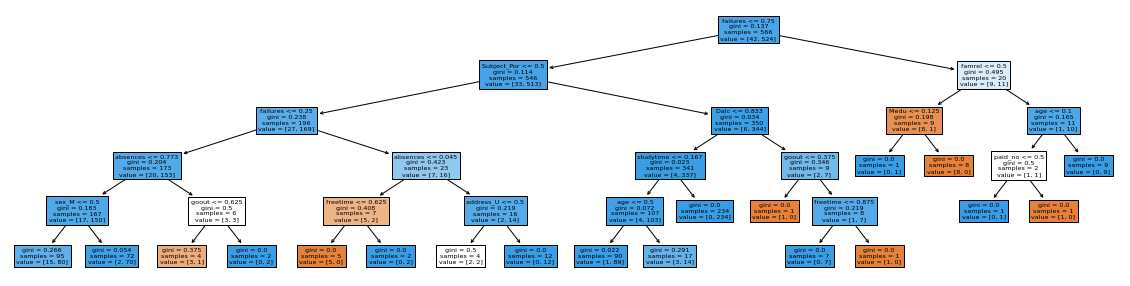

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 5))
_ = plot_tree(trees[-1], feature_names=X_train_no_G1.columns, filled=True)

Чаще всего появляются признаки:
- доля заваленных экзаменов
- доля пропущенных занятий
- выбран ли какой-то конкретный предмет
- работа родителя (какая-то определённая и другая)
- образование родителя
- поддержка в школе
- наличие платных курсов
- адрес

Написано "чаще всего", т.к. при нескольких запусках программы дерево меняется

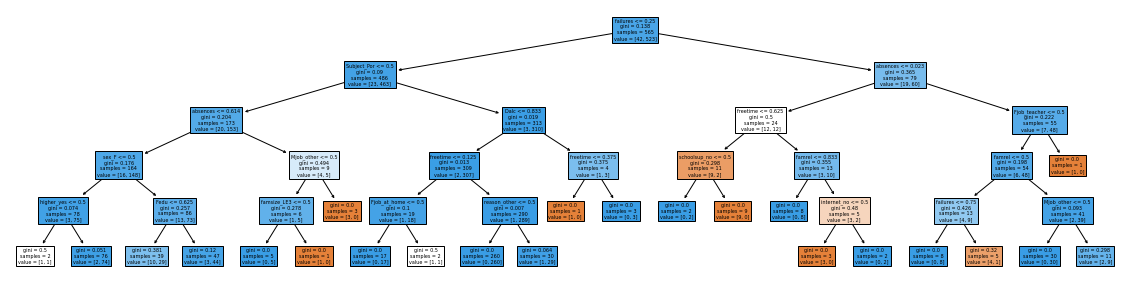

In [44]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[0], feature_names=X_train_no_G1.columns, filled=True)

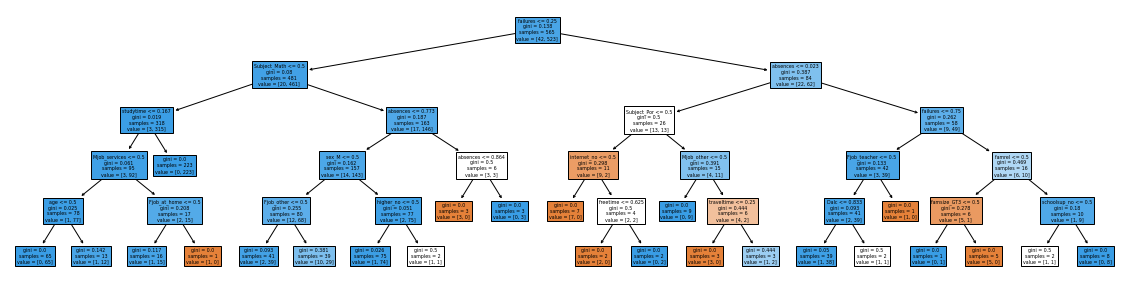

In [45]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[1], feature_names=X_train_no_G1.columns, filled=True)

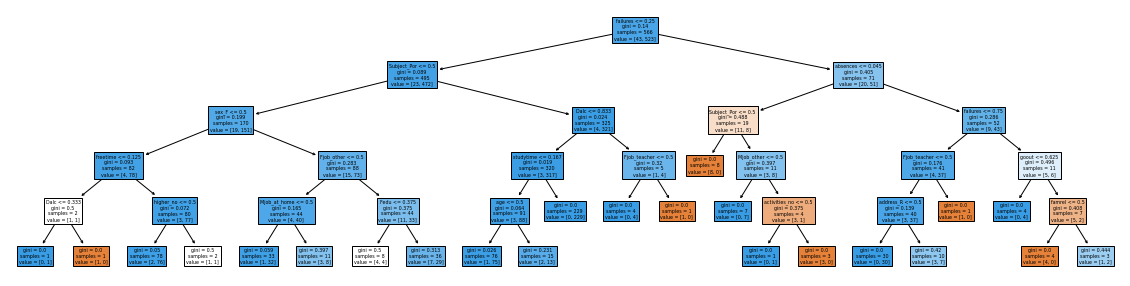

In [46]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[2], feature_names=X_train_no_G1.columns, filled=True)

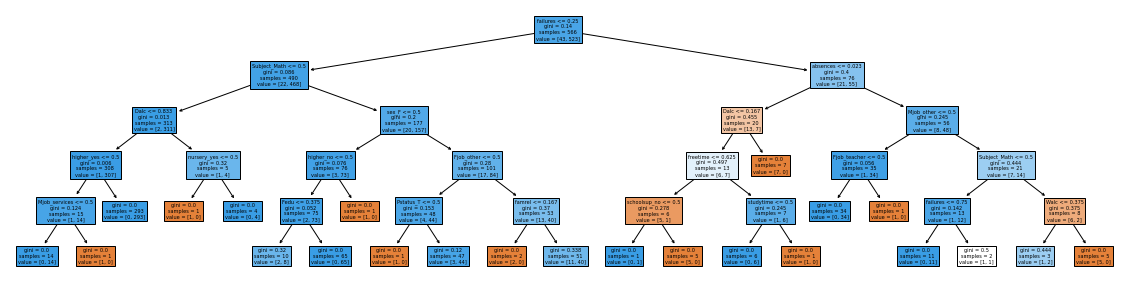

In [47]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[3], feature_names=X_train_no_G1.columns, filled=True)

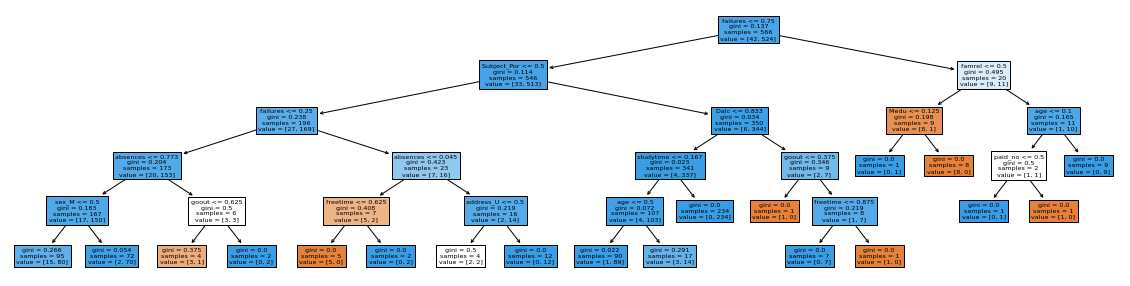

In [48]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[4], feature_names=X_train_no_G1.columns, filled=True)

В целом, деревья получились похожие, многие узлы повторяются или полностью, или переставлены, или используют обратные условия (например предмет == Математика и предмет == Португальский)

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [49]:
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [50]:
rkf = RepeatedKFold(n_splits=5, n_repeats=2)
    
n_trees = range(1, 200, 5)
random_scores = []
basic_scores = []

for i in n_trees:
    random_score = cross_val_score(RandomForestClassifier(n_estimators=i), X_train_no_G1, y_train_will_pass, cv=rkf)
    random_scores.append(random_score)
    
    basic_score = cross_val_score(DecisionTreeClassifier(), X_train_no_G1, y_train_will_pass, cv=rkf)
    basic_scores.append(basic_score)

Покажем, как менялся наименьший и наибольший cross_val_score с измененим числа деревьев. Для сравнения красным показан наибольший и наименьший cross_val_score у простого дерева

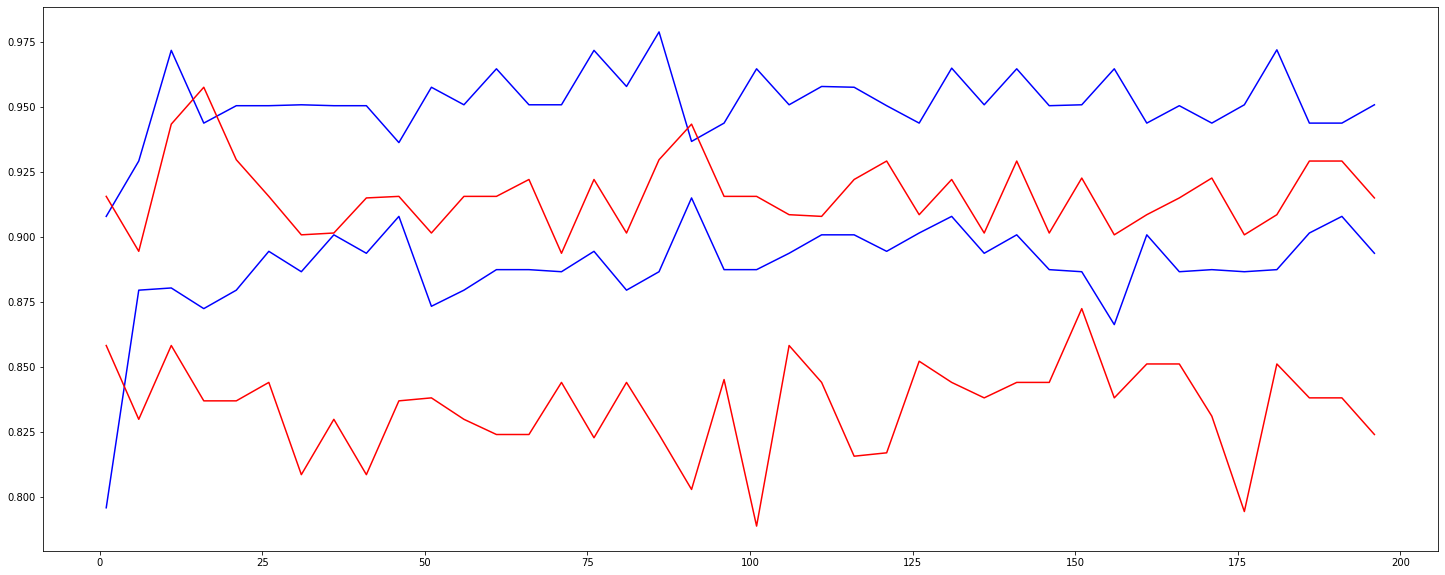

In [51]:
plt.figure(figsize=(25, 10))
plt.plot(n_trees, [(min(scores), max(scores)) for scores in random_scores], 'b')
plt.plot(n_trees, [(min(scores), max(scores)) for scores in basic_scores], 'r')

Можно было бы сказать, что достаточно 25 деревьев, т.к. именно на этой отметке наблюдается наибольший из наибольших cross_val_score, однако в этой же точке большой отрыв от наименьшего. В целом видно, что где есть пики, там же есть и провалы, а разброс значения уменьшается при увеличении числа деревьев.

Нужно найти точку, где расхождения в величинах будут наименьшими и достаточно большими в целом - это будет свидетельствовать о высоком качестве дерева и его стабильности. Под такой критерий подходят точки в районе 75, 90 и 160 деревьев.

Простое же дерево решений ведёт себя крайне непредсказуемо.

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валидиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from time import time

In [53]:
rfc_params = {
    'n_estimators': range(1, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 15),
    'min_samples_split': range(2, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [54]:
t = time()
rfc_trying_best_no_G1 = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rfc_params,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5)
).fit(X_train_no_G1, y_train_will_pass)
print(time() - t, 'sec')

21.290053606033325 sec


In [55]:
rfc_trying_best_no_G1.best_params_

{'n_estimators': 175,
 'min_samples_split': 12,
 'max_features': None,
 'max_depth': 13,
 'criterion': 'entropy'}

Лучшие параметры от запуска к запуску меняются, а GridSearchCV с такой решёткой будет работать очень долго, поэтому здесь применяется RandomizedSearchCV

In [56]:
random_forest = rfc_trying_best_no_G1.best_estimator_.fit(X_train_no_G1, y_train_will_pass)

In [57]:
f1_scores = []

for single_forest in random_forest.estimators_:
    f1_scores.append(f1_score(y_test_will_pass, single_forest.predict(X_test_no_G1)))

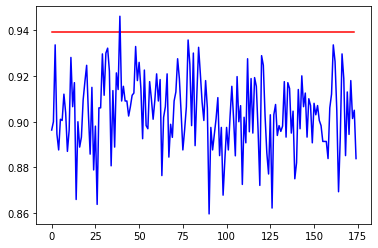

In [58]:
plt.plot([f1_score(y_test_will_pass, random_forest.predict(X_test_no_G1)) for i in range(1, len(f1_scores))], 'r')
plt.plot(f1_scores, 'b')

Как можно видеть, общее качество ансамбля выше среднего. Также наблюдаются большие "скачки" в качестве между соседними деревьями

In [59]:
pd.DataFrame(random_forest.feature_importances_, index=X_train_no_G1.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
failures,0.159661
absences,0.107813
Subject_Math,0.085611
Subject_Por,0.076141
age,0.040087
Mjob_other,0.036320
freetime,0.033923
goout,0.031297
Fedu,0.029102
reason_other,0.028121


Как можно видеть из таблицы, наиболее значимыми посчитались признаки выбранного предмета, пропущенных занятий,заваленных экзаменов, возраста, времени с друзьями и свободного времени. Этот вывод совпадает с тем, что был сделан при описании деревьев ранее

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [61]:
lr_params = {
    'C': np.linspace(1e-4, 1000, 200),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
    'tol': np.linspace(1e-6, 1, 1000)
}

In [62]:
t = time()
lr_trying_best = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_params,
    scoring='roc_auc',
    cv=RepeatedKFold(n_splits=5, n_repeats=2)
).fit(X_train_no_G1, y_train_will_pass)
print(time() - t, 'sec')

1.410435438156128 sec


In [63]:
lr_trying_best.best_params_

{'tol': 0.676677,
 'solver': 'liblinear',
 'penalty': 'l2',
 'class_weight': 'balanced',
 'C': 55.27647638190955}

In [64]:
logistic_regression = lr_trying_best.best_estimator_

In [65]:
logistic_rocs = []
random_rocs = []

for train_index, test_index in RepeatedKFold(n_splits=5, n_repeats=2).split(X_train_no_G1, y_train_will_pass):
    X_train_curr, X_test_curr = X_train_no_G1.to_numpy()[train_index], X_train_no_G1.to_numpy()[test_index]
    y_train_curr, y_test_curr = y_train_will_pass.array[train_index], y_train_will_pass.array[test_index]
    random_forest.fit(X_train_curr, y_train_curr)
    logistic_regression.fit(X_train_curr, y_train_curr)
    random_rocs.append(roc_auc_score(y_test_curr, random_forest.predict(X_test_curr)))
    logistic_rocs.append(roc_auc_score(y_test_curr, logistic_regression.predict(X_test_curr)))

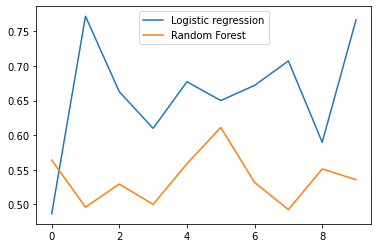

In [66]:
plt.plot(logistic_rocs, label='Logistic regression')
plt.plot(random_rocs, label='Random Forest')
plt.legend()

Как можно видеть, точность Логистической регрссии гораздо выше Случайного леса. Более того, ROC AUC Случайного леса близок к 0.5, что говорит о плохом качестве - модель не лучше рандома - и переобучении.

In [67]:
logistic_regression.fit(X_train_no_G1, y_train_will_pass)
random_forest.fit(X_train_no_G1, y_train_will_pass)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features=None,
                       min_samples_split=12, n_estimators=175)

In [68]:
from sklearn.metrics import plot_roc_curve

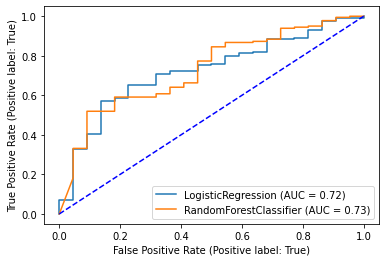

In [69]:
ax = plt.gca()

logreg_disp = plot_roc_curve(logistic_regression, X_test_no_G1, y_test_will_pass,ax=ax)
randfor_disp = plot_roc_curve(random_forest, X_test_no_G1, y_test_will_pass, ax=ax)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), '--b')

plt.legend()

При обучении на всех данных, метрики моделей стали заметно лучше и почти сравнялись.

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [70]:
from catboost import CatBoostClassifier, Pool

In [71]:
X_train_typed_no_G1 = X_train_no_G1.copy()
X_train_typed_no_G1[categ] = X_train_typed_no_G1[categ].astype('int64')

X_test_typed_no_G1  =  X_test_no_G1.copy()
X_test_typed_no_G1[categ] = X_test_typed_no_G1[categ].astype('int64')

y_train_typed = [1 if y else 0 for y in y_train_will_pass]
y_test_typed = [1 if y else 0 for y in y_test_will_pass]

In [72]:
cat_features = categ

cbc = CatBoostClassifier()
cbc.fit(X_train_typed_no_G1, y_train_typed, cat_features=cat_features, verbose=False)

roc_auc_score(y_test_typed, cbc.predict(X_test_typed_no_G1))

0.5

In [73]:
n_trees = range(1, 20, 2)
catboost_scores = []

for i in n_trees:
    cbc = CatBoostClassifier(n_estimators=i)
    catboost_score = cross_val_score(cbc, X_train_typed_no_G1, y_train_typed, cv=skf, scoring='roc_auc')
    catboost_scores.append(catboost_score)
    print(cbc.is_fitted())

Learning rate set to 0.5
0:	learn: 0.2950506	total: 9.45ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2867534	total: 5.16ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2893270	total: 18ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2990183	total: 6.68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2922564	total: 30.7ms	remaining: 0us
False
Learning rate set to 0.5
0:	learn: 0.2894266	total: 7.29ms	remaining: 14.6ms
1:	learn: 0.2020838	total: 24.5ms	remaining: 12.3ms
2:	learn: 0.1815466	total: 29.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3005448	total: 20.4ms	remaining: 40.8ms
1:	learn: 0.2280390	total: 30.3ms	remaining: 15.2ms
2:	learn: 0.1595908	total: 33.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2868252	total: 26.4ms	remaining: 52.9ms
1:	learn: 0.2195441	total: 29.7ms	remaining: 14.8ms
2:	learn: 0.1690559	total: 34.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2984023	total: 17.8ms	remaining: 35.6ms
1:	learn: 0.205

4:	learn: 0.1460424	total: 83.9ms	remaining: 101ms
5:	learn: 0.1300556	total: 87.6ms	remaining: 73ms
6:	learn: 0.1143930	total: 100ms	remaining: 57.3ms
7:	learn: 0.0999078	total: 106ms	remaining: 39.7ms
8:	learn: 0.0840338	total: 110ms	remaining: 24.3ms
9:	learn: 0.0787547	total: 131ms	remaining: 13.1ms
10:	learn: 0.0730084	total: 139ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2940264	total: 17.1ms	remaining: 171ms
1:	learn: 0.2225644	total: 32.2ms	remaining: 145ms
2:	learn: 0.1738638	total: 36ms	remaining: 96ms
3:	learn: 0.1535871	total: 40.9ms	remaining: 71.6ms
4:	learn: 0.1285591	total: 46.1ms	remaining: 55.3ms
5:	learn: 0.1103268	total: 66.9ms	remaining: 55.7ms
6:	learn: 0.1044686	total: 71.4ms	remaining: 40.8ms
7:	learn: 0.0978243	total: 76.1ms	remaining: 28.5ms
8:	learn: 0.0824719	total: 84.8ms	remaining: 18.8ms
9:	learn: 0.0682837	total: 87.8ms	remaining: 8.78ms
10:	learn: 0.0600644	total: 94.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2928466	total: 12.5m

14:	learn: 0.0676128	total: 180ms	remaining: 0us
Learning rate set to 0.380111
0:	learn: 0.3390797	total: 8.61ms	remaining: 121ms
1:	learn: 0.2499759	total: 11.1ms	remaining: 72.4ms
2:	learn: 0.1954878	total: 18.6ms	remaining: 74.5ms
3:	learn: 0.1757664	total: 32.6ms	remaining: 89.7ms
4:	learn: 0.1591127	total: 47.7ms	remaining: 95.4ms
5:	learn: 0.1409529	total: 56.2ms	remaining: 84.3ms
6:	learn: 0.1329281	total: 60.1ms	remaining: 68.7ms
7:	learn: 0.1214947	total: 66ms	remaining: 57.7ms
8:	learn: 0.1101128	total: 86.7ms	remaining: 57.8ms
9:	learn: 0.0979310	total: 93.5ms	remaining: 46.7ms
10:	learn: 0.0916350	total: 101ms	remaining: 36.6ms
11:	learn: 0.0862669	total: 118ms	remaining: 29.4ms
12:	learn: 0.0752155	total: 144ms	remaining: 22.1ms
13:	learn: 0.0695243	total: 161ms	remaining: 11.5ms
14:	learn: 0.0602966	total: 164ms	remaining: 0us
False
Learning rate set to 0.338639
0:	learn: 0.3771762	total: 26.7ms	remaining: 427ms
1:	learn: 0.2767812	total: 34.1ms	remaining: 256ms
2:	learn:

Learning rate set to 0.306034
0:	learn: 0.3968779	total: 19.3ms	remaining: 347ms
1:	learn: 0.2964039	total: 22.8ms	remaining: 194ms
2:	learn: 0.2243287	total: 27.2ms	remaining: 145ms
3:	learn: 0.2015497	total: 35ms	remaining: 131ms
4:	learn: 0.1874434	total: 54.3ms	remaining: 152ms
5:	learn: 0.1666762	total: 59.3ms	remaining: 128ms
6:	learn: 0.1484655	total: 65.5ms	remaining: 112ms
7:	learn: 0.1361145	total: 81.6ms	remaining: 112ms
8:	learn: 0.1275363	total: 90.7ms	remaining: 101ms
9:	learn: 0.1220128	total: 95.5ms	remaining: 85.9ms
10:	learn: 0.1172948	total: 101ms	remaining: 73.2ms
11:	learn: 0.1116709	total: 115ms	remaining: 67.4ms
12:	learn: 0.1028111	total: 135ms	remaining: 62.2ms
13:	learn: 0.0949795	total: 140ms	remaining: 50ms
14:	learn: 0.0871718	total: 147ms	remaining: 39.1ms
15:	learn: 0.0846725	total: 167ms	remaining: 31.2ms
16:	learn: 0.0788497	total: 175ms	remaining: 20.6ms
17:	learn: 0.0699618	total: 179ms	remaining: 9.96ms
18:	learn: 0.0640051	total: 184ms	remaining: 0u

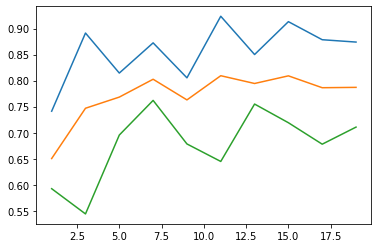

In [74]:
plt.plot(n_trees, [(max(scores), np.mean(scores), min(scores)) for scores in catboost_scores])

Как можно видеть по графикам максимального и минимального значения метрики ROC AUC, при увеличении числа деревьев метрика в целом растёт

In [75]:
cbc_params = {
    'n_estimators': range(1, 20),
    'learning_rate': np.linspace(1e-3, 1, 1000),
    'depth': range(1, 10),
    'feature_border_type': ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy']
}

In [76]:
t = time()
cbc_trying_best_no_G1 = RandomizedSearchCV(
    estimator=CatBoostClassifier(),
    param_distributions=cbc_params,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5)
).fit(X_train_typed_no_G1, y_train_typed, cat_features=cat_features)
print(time() - t, 'sec')

0:	learn: 0.5352430	total: 9.81ms	remaining: 19.6ms
1:	learn: 0.4348489	total: 32.8ms	remaining: 16.4ms
2:	learn: 0.3670180	total: 37.4ms	remaining: 0us
0:	learn: 0.5340592	total: 19ms	remaining: 38ms
1:	learn: 0.4334215	total: 24.5ms	remaining: 12.3ms
2:	learn: 0.3606113	total: 36.2ms	remaining: 0us
0:	learn: 0.5230713	total: 29.3ms	remaining: 58.7ms
1:	learn: 0.4039947	total: 42.1ms	remaining: 21ms
2:	learn: 0.3249417	total: 46.2ms	remaining: 0us
0:	learn: 0.5282306	total: 34ms	remaining: 68ms
1:	learn: 0.4112580	total: 42.2ms	remaining: 21.1ms
2:	learn: 0.3319605	total: 59.1ms	remaining: 0us
0:	learn: 0.5274585	total: 7.85ms	remaining: 15.7ms
1:	learn: 0.4109710	total: 34.4ms	remaining: 17.2ms
2:	learn: 0.3457759	total: 39.9ms	remaining: 0us
0:	learn: 0.5340589	total: 954us	remaining: 1.91ms
1:	learn: 0.4350715	total: 2.04ms	remaining: 1.02ms
2:	learn: 0.3731735	total: 3.09ms	remaining: 0us
0:	learn: 0.5342770	total: 1.14ms	remaining: 2.27ms
1:	learn: 0.4345007	total: 2.44ms	remaini

0:	learn: 0.5478650	total: 2.28ms	remaining: 36.5ms
1:	learn: 0.4303945	total: 4.22ms	remaining: 31.6ms
2:	learn: 0.3543929	total: 6ms	remaining: 28ms
3:	learn: 0.3085962	total: 7.95ms	remaining: 25.8ms
4:	learn: 0.2808200	total: 9.78ms	remaining: 23.5ms
5:	learn: 0.2585675	total: 11.8ms	remaining: 21.6ms
6:	learn: 0.2445603	total: 14.5ms	remaining: 20.8ms
7:	learn: 0.2211329	total: 16.6ms	remaining: 18.6ms
8:	learn: 0.2143309	total: 18ms	remaining: 16ms
9:	learn: 0.2063016	total: 20ms	remaining: 14ms
10:	learn: 0.1958594	total: 21.9ms	remaining: 12ms
11:	learn: 0.1887668	total: 24.1ms	remaining: 10.1ms
12:	learn: 0.1850614	total: 26.9ms	remaining: 8.27ms
13:	learn: 0.1828645	total: 29ms	remaining: 6.21ms
14:	learn: 0.1810202	total: 31ms	remaining: 4.13ms
15:	learn: 0.1780241	total: 32.7ms	remaining: 2.04ms
16:	learn: 0.1742933	total: 34.4ms	remaining: 0us
0:	learn: 0.2374443	total: 24.7ms	remaining: 49.4ms
1:	learn: 0.1845543	total: 28.1ms	remaining: 14ms
2:	learn: 0.1212338	total: 34

0:	learn: 0.2694374	total: 25.8ms	remaining: 207ms
1:	learn: 0.1544628	total: 32.5ms	remaining: 114ms
2:	learn: 0.1207390	total: 40.2ms	remaining: 80.4ms
3:	learn: 0.1045359	total: 48.9ms	remaining: 61.1ms
4:	learn: 0.0847366	total: 54.2ms	remaining: 43.3ms
5:	learn: 0.0638053	total: 60.4ms	remaining: 30.2ms
6:	learn: 0.0531820	total: 69.5ms	remaining: 19.9ms
7:	learn: 0.0504450	total: 87ms	remaining: 10.9ms
8:	learn: 0.0426758	total: 92.7ms	remaining: 0us
0:	learn: 0.2815553	total: 18ms	remaining: 144ms
1:	learn: 0.1545580	total: 24ms	remaining: 84ms
2:	learn: 0.1198265	total: 36ms	remaining: 71.9ms
3:	learn: 0.0951817	total: 45.5ms	remaining: 56.8ms
4:	learn: 0.0872838	total: 51.5ms	remaining: 41.2ms
5:	learn: 0.0707169	total: 71.3ms	remaining: 35.7ms
6:	learn: 0.0626725	total: 81.1ms	remaining: 23.2ms
7:	learn: 0.0569444	total: 86.5ms	remaining: 10.8ms
8:	learn: 0.0470313	total: 91.8ms	remaining: 0us
0:	learn: 0.2760713	total: 19ms	remaining: 152ms
1:	learn: 0.1636551	total: 27ms	re

In [77]:
print(cbc_trying_best_no_G1.best_score_)
print(cbc_trying_best_no_G1.best_params_)

catboostclass = cbc_trying_best_no_G1.best_estimator_

0.962784259204249
{'n_estimators': 9, 'learning_rate': 0.644, 'feature_border_type': 'Median', 'depth': 7}


In [78]:
catboostclass.fit(X_train_typed_no_G1, y_train_typed)

0:	learn: 0.2455978	total: 12.4ms	remaining: 99.2ms
1:	learn: 0.1765017	total: 20.3ms	remaining: 71ms
2:	learn: 0.1372036	total: 27.1ms	remaining: 54.2ms
3:	learn: 0.1076052	total: 43.9ms	remaining: 54.8ms
4:	learn: 0.0820843	total: 50.1ms	remaining: 40.1ms
5:	learn: 0.0756985	total: 58.1ms	remaining: 29ms
6:	learn: 0.0634798	total: 66.3ms	remaining: 18.9ms
7:	learn: 0.0559259	total: 77.2ms	remaining: 9.64ms
8:	learn: 0.0515138	total: 84.6ms	remaining: 0us


In [79]:
pool = Pool(X_test_typed_no_G1, y_test_typed)

for model_name, model in models.items():
    if 'no_G1' in model_name:
        y_pred = model.predict(X_test_no_G1)
    else:
        y_pred = model.predict(X_test_G1)
    print('ROC AUC for', model_name, ':' , roc_auc_score(y_test_will_pass, y_pred))

print('ROC AUC for', 'catboost', ':', np.mean(catboostclass.eval_metrics(pool, ['AUC'])['AUC']), end='\n\n')

for model_name, model in models.items():
    if 'no_G1' in model_name:
        y_pred = model.predict(X_test_no_G1)
    else:
        y_pred = model.predict(X_test_G1)
    y_pred = [y >= 8 for y in y_pred]
    print('F1 SCORE for', model_name, ':' , f1_score(y_test_will_pass, y_pred))

print('F1 SCORE for', 'catboost', ':' , np.mean(catboostclass.eval_metrics(pool, ['F1'])['F1']))

ROC AUC for linear_G1 : 0.8842290306378705
ROC AUC for lasso_G1 : 0.5
ROC AUC for ridge_G1 : 0.8081366147664489
ROC AUC for knr_G1 : 0.6747865394274234
ROC AUC for dtr_G1 : 0.8898794575590155
ROC AUC for rfr_G1 : 0.9105976896032144
ROC AUC for linear_no_G1 : 0.7024108488196887
ROC AUC for lasso_no_G1 : 0.5
ROC AUC for ridge_no_G1 : 0.6911099949773982
ROC AUC for knr_no_G1 : 0.6064791562029131
ROC AUC for dtr_no_G1 : 0.6099949773982924
ROC AUC for rfr_no_G1 : 0.7165996986438974
ROC AUC for catboost : 0.7117445169931358

F1 SCORE for linear_G1 : 0.9261363636363636
F1 SCORE for lasso_G1 : 0.9427083333333334
F1 SCORE for ridge_G1 : 0.9393139841688654
F1 SCORE for knr_G1 : 0.9427083333333334
F1 SCORE for dtr_G1 : 0.9476584022038568
F1 SCORE for rfr_G1 : 0.9534246575342465
F1 SCORE for linear_no_G1 : 0.915068493150685
F1 SCORE for lasso_no_G1 : 0.9427083333333334
F1 SCORE for ridge_no_G1 : 0.9287598944591029
F1 SCORE for knr_no_G1 : 0.9399477806788512
F1 SCORE for dtr_no_G1 : 0.9427083333333

CatBoost по всем метрикам находится среди остальных моделей - не лучше и не хуже

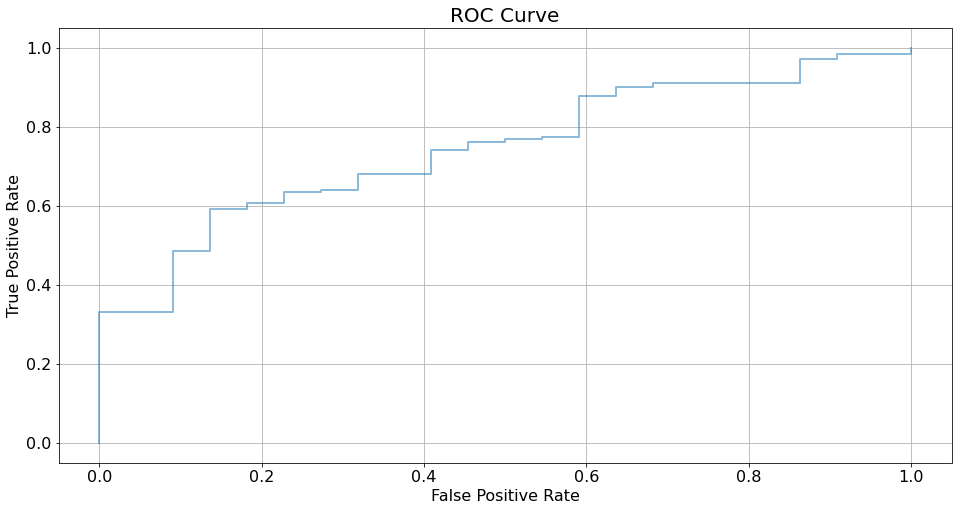

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04545455, 0.09090909, 0.09090909, 0.09090909,
        0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
        0.09090909, 0.09090909, 0.09090909, 0.09

In [80]:
from catboost.utils import get_roc_curve

get_roc_curve(catboostclass, pool, plot=True)

Также CatBoost показывает хорошую ROC-кривую

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [81]:
def encode_mark(mark):
    if 18 <= mark <= 20:
        return 'excellent'
    elif 14 <= mark <= 17:
        return 'good'
    elif 8 <= mark <= 13:
        return 'satisfactory'
    elif mark < 8:
        return 'unsatisfactory'

In [82]:
# будем использовать эти ответы
y_train_encoded = [encode_mark(mark) for mark in y_train_dropped]
y_test_encoded = [encode_mark(mark) for mark in y_test_dropped]

In [83]:
X_train_typed_no_G1  # и эти данные

,internet_no,internet_yes,activities_no,activities_yes,sex_F,sex_M,famsize_GT3,famsize_LE3,Subject_Math,Subject_Por,reason_course,reason_home,reason_other,reason_reputation,address_R,address_U,romantic_no,romantic_yes,higher_no,higher_yes,...,guardian_other,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,paid_no,paid_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,...,0,0,1,1,0,1,0,0.8,0.50,0.25,0.0,0.000000,0.0,1.000000,0.50,0.75,0.000000,0.75,0.75,0.454545
1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,0.0,0.75,1.00,0.0,0.000000,0.0,1.000000,1.00,1.00,0.666667,0.25,1.00,0.000000
2,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,1,0,0.0,0.75,0.75,0.0,1.000000,0.0,0.666667,0.50,0.50,0.000000,0.00,0.75,0.454545
3,0,1,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,...,0,0,1,1,0,1,0,0.6,1.00,1.00,0.5,0.666667,0.0,1.000000,0.75,0.75,0.000000,0.00,0.00,0.000000
4,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,0.6,0.25,0.25,0.5,0.333333,0.5,0.666667,0.75,0.50,0.333333,0.50,1.00,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,...,0,0,1,1,0,0,1,0.0,1.00,1.00,0.5,0.333333,1.0,0.666667,0.75,0.75,0.333333,0.50,1.00,0.272727
703,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,...,0,0,1,1,0,1,0,0.2,0.50,0.50,0.5,0.000000,0.0,1.000000,0.75,0.50,0.333333,0.75,0.75,0.272727
704,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,1,0,0.8,0.25,0.25,0.5,0.000000,0.5,0.666667,0.50,0.25,0.000000,0.50,1.00,0.000000
705,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,...,0,0,1,1,0,1,0,0.8,0.75,0.75,0.0,0.333333,0.5,0.666667,1.00,0.50,0.000000,0.25,1.00,0.000000


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
knc_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}


lr_params = {
    'C': np.linspace(1e-4, 1000, 200),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
    'tol': np.linspace(1e-6, 1, 1000)
}


dtc_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}


rfc_params = {
    'n_estimators': range(1, 200, 5),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}


gbc_params = {
    'loss': ['deviance'],
    'learning_rate': [1e-4, 1e-3, 0.01, 0.1, 1],
    'n_estimators': range(1, 200, 5),
    'criterion': ['friedman_mse', 'mse'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [86]:
knc_no_G1 = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knc_params,
    scoring='accuracy'
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(knc_no_G1)

lr_no_G1 = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_params,
    scoring='accuracy'
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(lr_no_G1)

dtc_no_G1 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=dtc_params,
    scoring='accuracy'
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(dtc_no_G1)

rfc_no_G1 = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rfc_params,
    scoring='accuracy'
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(rfc_no_G1)

gbc_no_G1 = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gbc_params,
    scoring='accuracy'
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(gbc_no_G1)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=41, metric='manhattan',
                     n_neighbors=11, weights='distance')
LogisticRegression(C=577.8894894472362, class_weight='balanced', penalty='l1',
                   solver='liblinear', tol=0.49149199999999993)
DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=4,
                       splitter='random')
RandomForestClassifier(criterion='entropy', max_depth=6, max_features=None,
                       min_samples_split=3, n_estimators=36)
GradientBoostingClassifier(max_features='sqrt', n_estimators=166)


In [105]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

In [97]:
classifiers = {
    'KNeighborsClassifier': knc_no_G1,
    'LogisitcRegression': lr_no_G1,
    'DecisionTreeClassifier': dtc_no_G1,
    'RandomForestClassifier': rfc_no_G1,
    'GradientBoostingCLassifier': gbc_no_G1
}

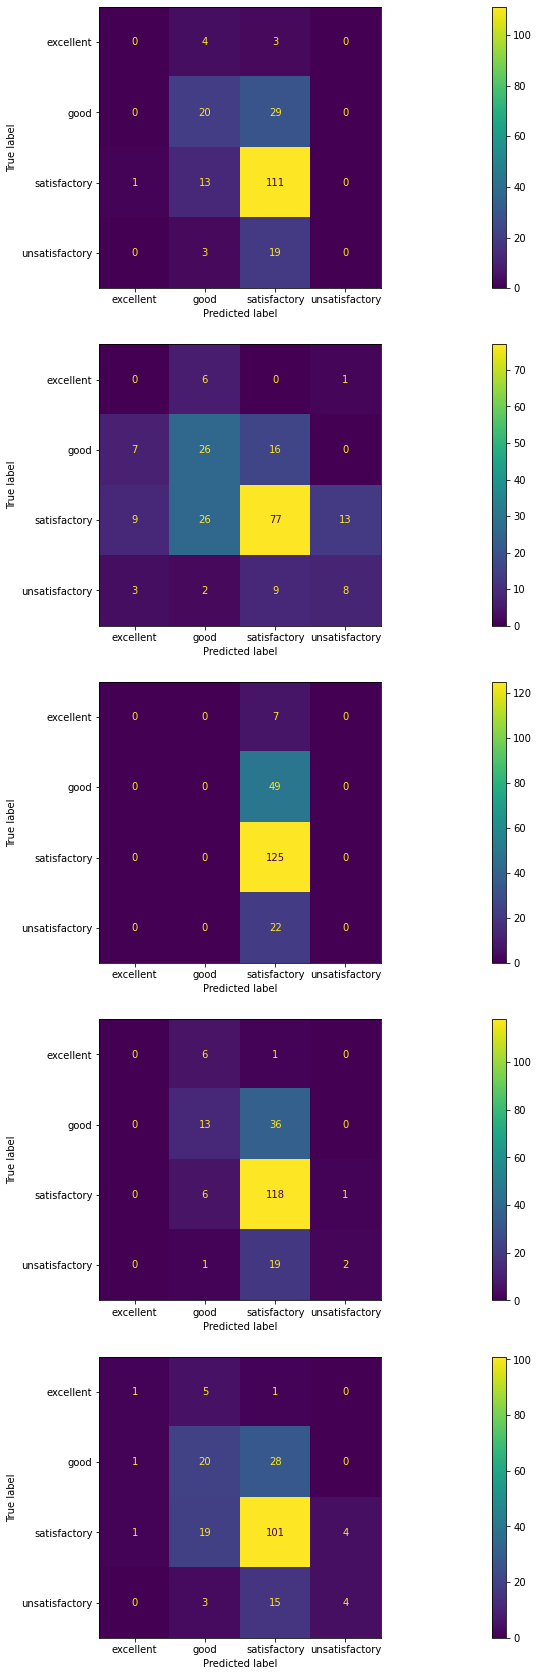

In [99]:
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(40, 30))

for clf, ax in zip(classifiers.values(), axes.flat):
    plot_confusion_matrix(clf, X_test_typed_no_G1, y_test_encoded, ax=ax)

plt.show()

Как можно видеть, все классификаторы значительно лучше распознали отметки категории "удовлетворительно"

In [100]:
classifiers_results = pd.DataFrame(columns=['precision', 'recall', 'f1', 'accuracy', 'roc_auc'])

In [117]:
le = LabelEncoder().fit(y_train_encoded)

for clf_name, clf in classifiers.items():
    metrics = precision_recall_fscore_support(y_test_encoded, clf.predict(X_test_typed_no_G1), average='micro')
    acc_score = accuracy_score(y_test_encoded, clf.predict(X_test_typed_no_G1))
    
    y_true = le.transform(y_test_encoded)
    
    roc_score = roc_auc_score(y_true, clf.predict_proba(X_test_typed_no_G1), multi_class='ovo')
        
    classifiers_results.loc[clf_name, 'precision'] = metrics[0]
    classifiers_results.loc[clf_name, 'recall'] = metrics[1]
    classifiers_results.loc[clf_name, 'f1'] = metrics[2]
    classifiers_results.loc[clf_name, 'accuracy'] = acc_score
    classifiers_results.loc[clf_name, 'roc_auc'] = roc_score

In [120]:
classifiers_results

,precision,recall,f1,accuracy,roc_auc
KNeighborsClassifier,0.64532,0.64532,0.64532,0.64532,0.676027
LogisitcRegression,0.546798,0.546798,0.546798,0.546798,0.729495
DecisionTreeClassifier,0.615764,0.615764,0.615764,0.615764,0.634706
RandomForestClassifier,0.655172,0.655172,0.655172,0.655172,0.728807
GradientBoostingCLassifier,0.62069,0.62069,0.62069,0.62069,0.744518


Получилось, что RandomForest справился лучше всех: по аккуратности, полноте, F1 и точности получился лучше остальных. По метрике ROC AUC же лучшим получился Градиентный Бустинг